<a href="https://colab.research.google.com/github/daniel-saunders-phil/dancing-game/blob/main/Dancing_Game_Reproducible_Data_Analysis_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook reproduces all of the figures in the paper [The Evolution of gender-biased social learning.](https://github.com/daniel-saunders-phil/dancing-game/blob/main/The%20evolution%20of%20gender-biased%20social%20learning.pdf)

In [ ]:
# packages

import pandas as pd
import pathlib as pl
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# plot settings

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['font.size'] = 14

## Figure 1

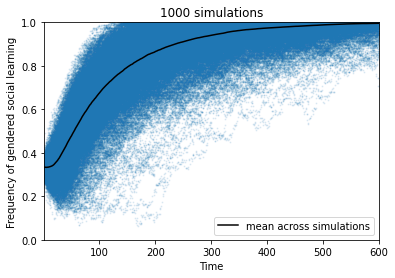

In [ ]:
# all of the raw data files are really big
# so i had to break them into small chunks before uploading
# to github.
# this first bit of code recombines the small chunks
# into the original data file.

url1 = "https://raw.githubusercontent.com/daniel-saunders-phil/dancing-game/main/data/Dancing%20Game%20-%20Matrix%20Setup%20-%20social%20learning%20part%201-table.csv"
url2 = "https://raw.githubusercontent.com/daniel-saunders-phil/dancing-game/main/data/Dancing%20Game%20-%20Matrix%20Setup%20-%20social%20learning%20part%202-table.csv"
url3 = "https://raw.githubusercontent.com/daniel-saunders-phil/dancing-game/main/data/Dancing%20Game%20-%20Matrix%20Setup%20-%20social%20learning%20part%203-table.csv"

df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)
df3 = pd.read_csv(url3)

df = pd.concat([df1,df2,df3])

# extract the y and x coordinates
# x is time
# y is the frequency of players using in-group social learning

freq = df['count players with [learning-style = 1] / n-of-players']
step = df['[step]']

# introducing a tiny amount of noise will
# smooth out the visuals
# otherwise, you would get a very rigid
# chess-board like graph
# that suggests a discrete process that is 
# far more continuous.

noise_1 = np.random.normal(0,1,size=len(df))

# plot it

plt.plot(step+noise_1,freq, 'o', alpha=.1, markersize=1, color='tab:blue')
plt.ylim(0,1)
plt.xlim(1,600)
plt.title('1000 simulations')
plt.ylabel('Frequency of gendered social learning')
plt.xlabel('Time')

# find the average frequency across all 1000 simulations

avgs = []

for i in range(600):
    selection = step == i
    avgs.append(freq[selection].mean())

# plot that too.
    
plt.plot(avgs, color='black',label="mean across simulations")
plt.legend()
plt.show()

## Figure 2

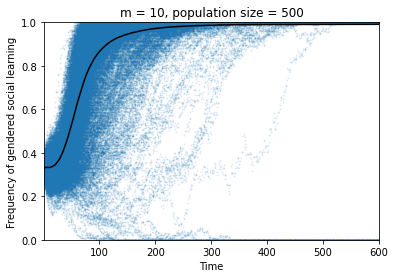

In [ ]:
url1 = "https://raw.githubusercontent.com/daniel-saunders-phil/dancing-game/main/data/Dancing%20Game%20-%20Matrix%20Setup%20-%20mem%2010%20part%201-table.csv"
url2 = "https://raw.githubusercontent.com/daniel-saunders-phil/dancing-game/main/data/Dancing%20Game%20-%20Matrix%20Setup%20-%20mem%2010%20part%202-table.csv"
url3 = "https://raw.githubusercontent.com/daniel-saunders-phil/dancing-game/main/data/Dancing%20Game%20-%20Matrix%20Setup%20-%20mem%2010%20part%203-table.csv"

df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)
df3 = pd.read_csv(url3)

df = pd.concat([df1,df2,df3])

freq = df['count players with [learning-style-current = 1] / n-of-players']
step = df['[step]']

noise_1 = np.random.normal(0,1,size=len(df))
noise_2 = np.random.normal(0,.1,size=len(df))

plt.plot(step+noise_1,freq, 'o', alpha=.1, markersize=1, color='tab:blue')
plt.ylim(0,1)
plt.xlim(1,600)
plt.title('m = 10, population size = 500')
plt.ylabel('Frequency of gendered social learning')
plt.xlabel('Time')

avgs = []

for i in range(600):
    selection = step == i
    avgs.append(freq[selection].mean())
    
avgs

plt.plot(avgs, color='black')
plt.show()

## Figure 3

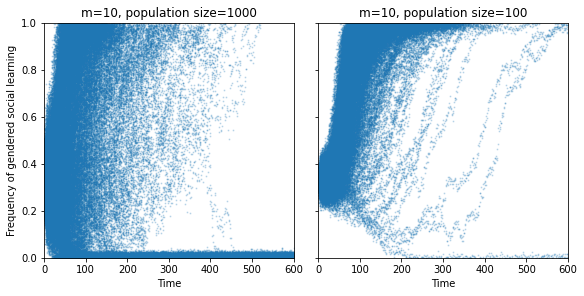

In [ ]:
url1 = "https://raw.githubusercontent.com/daniel-saunders-phil/dancing-game/main/data/Dancing%20Game%20-%20Matrix%20Setup%20-%20mem%2010%20pop%20100-table.csv"
url2 = "https://raw.githubusercontent.com/daniel-saunders-phil/dancing-game/main/data/Dancing%20Game%20-%20Matrix%20Setup%20-%20mem%2010%20pop%201000-table.csv"

df1 = pd.read_csv(url1,header=6)
df2 = pd.read_csv(url2,header=6)

dfs = [df1,df2]

titles = ["m=10, population size=1000",
          "m=10, population size=100"]

f, ax = plt.subplots(nrows=1,ncols=2,
                     sharex=True,sharey=True,
                     figsize=(8, 4),
                     constrained_layout=True)

for i in range(2):

    df = dfs[i]

    freq = df['count players with [learning-style-current = 1] / n-of-players']
    step = df['[step]']

    noise = stats.norm(0,.01).rvs(len(freq))

    ax[i].plot(step,freq+noise, 'o', alpha=.2, markersize=1, color='tab:blue')
    ax[i].set_title(titles[i]) # vary
    ax[i].set_ylim([0,1])
    ax[i].set_xlim([0,600])
    ax[0].set_ylabel('Frequency of gendered social learning')
    ax[i].set_xlabel('Time')

## Figure 4

In [ ]:
url1 = "https://raw.githubusercontent.com/daniel-saunders-phil/dancing-game/main/data/Dancing%20Game%20-%20Matrix%20Setup%20-%20mem%2010%20noise%200.01%20part%201-table.csv"
url2 = "https://raw.githubusercontent.com/daniel-saunders-phil/dancing-game/main/data/Dancing%20Game%20-%20Matrix%20Setup%20-%20mem%2010%20noise%200.01%20part%202-table.csv"
url3 = "https://raw.githubusercontent.com/daniel-saunders-phil/dancing-game/main/data/Dancing%20Game%20-%20Matrix%20Setup%20-%20mem%2010%20noise%200.01%20part%203-table.csv"

df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)
df3 = pd.read_csv(url3)

file1 = pd.concat([df1,df2,df3])

url1 = "https://raw.githubusercontent.com/daniel-saunders-phil/dancing-game/main/data/Dancing%20Game%20-%20Matrix%20Setup%20-%20mem%2010%20noise%200.001%20part%201-table.csv"
url2 = "https://raw.githubusercontent.com/daniel-saunders-phil/dancing-game/main/data/Dancing%20Game%20-%20Matrix%20Setup%20-%20mem%2010%20noise%200.001%20part%202-table.csv"
url3 = "https://raw.githubusercontent.com/daniel-saunders-phil/dancing-game/main/data/Dancing%20Game%20-%20Matrix%20Setup%20-%20mem%2010%20noise%200.001%20part%203-table.csv"

df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)
df3 = pd.read_csv(url3)

file2 = pd.concat([df1,df2,df3])

url1 = "https://raw.githubusercontent.com/daniel-saunders-phil/dancing-game/main/data/Dancing%20Game%20-%20Matrix%20Setup%20-%20mem%201%20noise%200.01%20part%201-table.csv"
url2 = "https://raw.githubusercontent.com/daniel-saunders-phil/dancing-game/main/data/Dancing%20Game%20-%20Matrix%20Setup%20-%20mem%201%20noise%200.01%20part%202-table.csv"
url3 = "https://raw.githubusercontent.com/daniel-saunders-phil/dancing-game/main/data/Dancing%20Game%20-%20Matrix%20Setup%20-%20mem%201%20noise%200.01%20part%203-table.csv"

df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)
df3 = pd.read_csv(url3)

file3 = pd.concat([df1,df2,df3])

url1 = "https://raw.githubusercontent.com/daniel-saunders-phil/dancing-game/main/data/Dancing%20Game%20-%20Matrix%20Setup%20-%20mem%201%20noise%200.001%20part%201-table.csv"
url2 = "https://raw.githubusercontent.com/daniel-saunders-phil/dancing-game/main/data/Dancing%20Game%20-%20Matrix%20Setup%20-%20mem%201%20noise%200.001%20part%202-table.csv"
url3 = "https://raw.githubusercontent.com/daniel-saunders-phil/dancing-game/main/data/Dancing%20Game%20-%20Matrix%20Setup%20-%20mem%201%20noise%200.001%20part%203-table.csv"

df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)
df3 = pd.read_csv(url3)

file4 = pd.concat([df1,df2,df3])


files = [[file1,file2],
        [file3,file4]]

titles = [[
    "m = 10, mutations = .01",
    "m = 10, mutations = .001"],
    [
    "m = 1, mutations = .01",
    "m = 1, mutations = .001"
    ]]

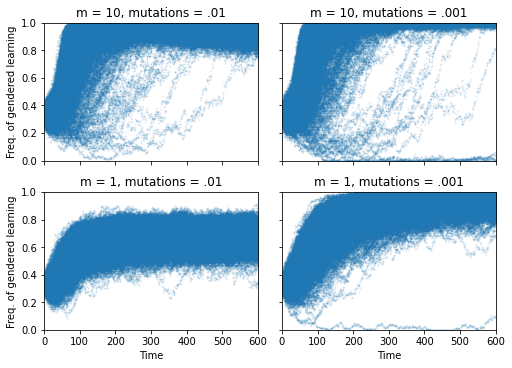

In [ ]:
f, ax = plt.subplots(nrows=2,ncols=2,
                     sharex=True,sharey=True,
                     figsize=(7, 5),
                     constrained_layout=True)

for i in range(2):
    for j in range(2):

        df = files[i][j]

        df = df.sort_values(by=['[step]'])

        freq = df['count players with [learning-style-current = 1] / n-of-players']
        payoff = df['sum [payoff] of players / n-of-players']
        step = df['[step]']

        noise_1 = np.random.normal(0,1,size=len(df))

        ax[i][j].plot(step+noise_1,freq, 'o', alpha=.1, markersize=1, color='tab:blue')
        ax[i][j].set_title(titles[i][j]) # vary
        ax[i][j].set_ylim([0,1])
        ax[i][j].set_xlim([0,600])
        ax[1][j].set_xlabel('Time')
        ax[i][0].set_ylabel('Freq. of gendered learning')

## Figure 5

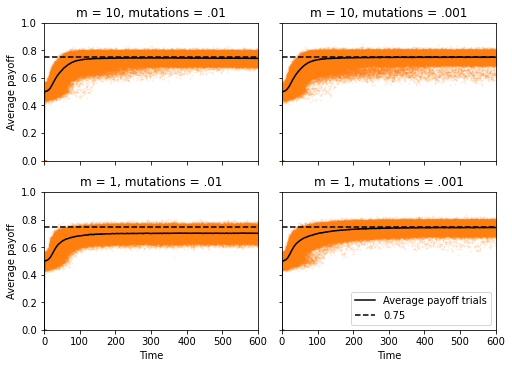

In [ ]:
f, ax = plt.subplots(nrows=2,ncols=2,
                     sharex=True,sharey=True,
                     figsize=(7, 5),
                     constrained_layout=True)

for i in range(2):
    for j in range(2):

        df = files[i][j]

        df = df.sort_values(by=['[step]'])
        
        payoff = df['sum [payoff] of players / n-of-players']
        step = df['[step]']
        
        avgs = []

        for k in range(600):
            selection = step == k
            avgs.append(payoff[selection].mean())

        dash = [.75] * len(step)

        noise_1 = np.random.normal(0,1,size=len(df))

        ax[i][j].plot(step+noise_1,payoff, 'o', alpha=.1, markersize=1, color='tab:orange')
        ax[i][j].plot(avgs, color="black", label="Average payoff trials")
        ax[i][j].plot(dash, '--', color="black", label="0.75")
        ax[i][j].set_title(titles[i][j]) # vary
        ax[i][j].set_ylim([0,1])
        ax[i][j].set_xlim([0,600])
        ax[1][j].set_xlabel('Time')
        ax[i][0].set_ylabel('Average payoff')
          
ax[1][1].legend(loc='lower right')

## Figure 6

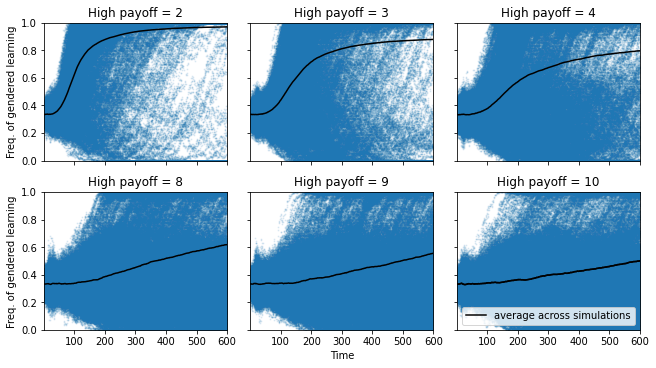

In [ ]:
fig, ax = plt.subplots(nrows=2,ncols=3,
                    sharex=True,sharey=True,
                    figsize=(9, 5), 
                    constrained_layout=True)


# part 1.0

url1 = "https://raw.githubusercontent.com/daniel-saunders-phil/dancing-game/main/data/Dancing%20Game%20-%20Matrix%20Setup%20-%20inequitable%20payoffs%201.1-table.csv"
url2 = "https://raw.githubusercontent.com/daniel-saunders-phil/dancing-game/main/data/Dancing%20Game%20-%20Matrix%20Setup%20-%20inequitable%20payoffs%201.2-table.csv"
url3 = "https://raw.githubusercontent.com/daniel-saunders-phil/dancing-game/main/data/Dancing%20Game%20-%20Matrix%20Setup%20-%20inequitable%20payoffs%201.3-table.csv"

df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)
df3 = pd.read_csv(url3)

df = pd.concat([df1,df2,df3])

freq = df['count players with [learning-style-current = 1] / n-of-players']
step = df['[step]']

noise_1 = np.random.normal(0,1,size=len(df))
ax[0][0].plot(step+noise_1,freq, 'o', alpha=.1, markersize=1, color='tab:blue')
ax[0][0].set_ylim(0,1)
ax[0][0].set_xlim(1,600)
ax[0][0].set_title('High payoff = 2')
ax[0][0].set_ylabel('Freq. of gendered learning')

avgs = []

for i in range(600):
    selection = step == i
    avgs.append(freq[selection].mean())

ax[0][0].plot(avgs, color='black')


# Part 2.0

file1 = "https://raw.githubusercontent.com/daniel-saunders-phil/dancing-game/main/data/Dancing%20Game%20-%20Matrix%20Setup%20-%20inequitable%20payoffs%202.1-table.csv"
file2 = "https://raw.githubusercontent.com/daniel-saunders-phil/dancing-game/main/data/Dancing%20Game%20-%20Matrix%20Setup%20-%20inequitable%20payoffs%202.2-table.csv"
file3 = "https://raw.githubusercontent.com/daniel-saunders-phil/dancing-game/main/data/Dancing%20Game%20-%20Matrix%20Setup%20-%20inequitable%20payoffs%202.3-table.csv"
file4 = "https://raw.githubusercontent.com/daniel-saunders-phil/dancing-game/main/data/Dancing%20Game%20-%20Matrix%20Setup%20-%20inequitable%20payoffs%202.4-table.csv"
file5 = "https://raw.githubusercontent.com/daniel-saunders-phil/dancing-game/main/data/Dancing%20Game%20-%20Matrix%20Setup%20-%20inequitable%20payoffs%202.5-table.csv"
file6 = "https://raw.githubusercontent.com/daniel-saunders-phil/dancing-game/main/data/Dancing%20Game%20-%20Matrix%20Setup%20-%20inequitable%20payoffs%202.6-table.csv"

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)
df4 = pd.read_csv(file4)
df5 = pd.read_csv(file5)
df6 = pd.read_csv(file6)

df = pd.concat([df1,df2,df3,df4,df5,df6])
    
selector_1 = df['payoffs'] == '[[0 1]\n [3 0]]'
data_1 = df[selector_1]

freq = data_1['count players with [learning-style-current = 1] / n-of-players']
step = data_1['[step]']

noise_1 = np.random.normal(0,1,size=len(data_1))

ax[0][1].plot(step+noise_1,freq, 'o', alpha=.1, markersize=1, color='tab:blue')
ax[0][1].set_ylim(0,1)
ax[0][1].set_xlim(1,600)
ax[0][1].set_title('High payoff = 3')

avgs = []

for i in range(600):
    selection = step == i
    avgs.append(freq[selection].mean())

ax[0][1].plot(avgs, color='black')

selector_2 = df['payoffs'] == '[[0 1]\n [4 0]]'
data_2 = df[selector_2]

freq = data_2['count players with [learning-style-current = 1] / n-of-players']
step = data_2['[step]']

noise_1 = np.random.normal(0,1,size=len(data_2))

ax[0][2].plot(step+noise_1,freq, 'o', alpha=.1, markersize=1, color='tab:blue')
ax[0][2].set_ylim(0,1)
ax[0][2].set_xlim(1,600)
ax[0][2].set_title('High payoff = 4')

avgs = []

for i in range(600):
    selection = step == i
    avgs.append(freq[selection].mean())

ax[0][2].plot(avgs, color='black')

## part 3

path1 = "https://raw.githubusercontent.com/daniel-saunders-phil/dancing-game/main/data/Dancing%20Game%20-%20Matrix%20Setup%20-%20inequitable%20payoffs%203.1-table.csv"
path2 = "https://raw.githubusercontent.com/daniel-saunders-phil/dancing-game/main/data/Dancing%20Game%20-%20Matrix%20Setup%20-%20inequitable%20payoffs%203.2-table.csv"
path3 = "https://raw.githubusercontent.com/daniel-saunders-phil/dancing-game/main/data/Dancing%20Game%20-%20Matrix%20Setup%20-%20inequitable%20payoffs%203.3-table.csv"
path4 = "https://raw.githubusercontent.com/daniel-saunders-phil/dancing-game/main/data/Dancing%20Game%20-%20Matrix%20Setup%20-%20inequitable%20payoffs%203.4-table.csv"
path5 = "https://raw.githubusercontent.com/daniel-saunders-phil/dancing-game/main/data/Dancing%20Game%20-%20Matrix%20Setup%20-%20inequitable%20payoffs%203.5-table.csv"
path6 = "https://raw.githubusercontent.com/daniel-saunders-phil/dancing-game/main/data/Dancing%20Game%20-%20Matrix%20Setup%20-%20inequitable%20payoffs%203.6-table.csv"
path7 = "https://raw.githubusercontent.com/daniel-saunders-phil/dancing-game/main/data/Dancing%20Game%20-%20Matrix%20Setup%20-%20inequitable%20payoffs%203.7-table.csv"
path8 = "https://raw.githubusercontent.com/daniel-saunders-phil/dancing-game/main/data/Dancing%20Game%20-%20Matrix%20Setup%20-%20inequitable%20payoffs%203.8-table.csv"
path9 = "https://raw.githubusercontent.com/daniel-saunders-phil/dancing-game/main/data/Dancing%20Game%20-%20Matrix%20Setup%20-%20inequitable%20payoffs%203.9-table.csv"

df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)
df3 = pd.read_csv(path3)
df4 = pd.read_csv(path4)
df5 = pd.read_csv(path5)
df6 = pd.read_csv(path6)
df7 = pd.read_csv(path7)
df8 = pd.read_csv(path8)
df9 = pd.read_csv(path9)

df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9])

selectors = ['[[0 1]\n [8 0]]','[[0 1]\n [9 0]]','[[0 1]\n [10 0]]']
titles = ['High payoff = 8','High payoff = 9','High payoff = 10']

for i in range(3):

    selector_1 = df['payoffs'] == selectors[i]
    data_1 = df[selector_1]

    data_1

    freq = data_1['count players with [learning-style-current = 1] / n-of-players']
    step = data_1['[step]']

    noise_1 = np.random.normal(0,1,size=len(data_1))

    ax[1][i].plot(step+noise_1,freq, 'o', alpha=.1, markersize=1, color='tab:blue')
    ax[1][i].set_ylim(0,1)
    ax[1][i].set_xlim(1,600)
    ax[1][i].set_title(titles[i])

    avgs = []

    for j in range(600):
        selection = step == j
        avgs.append(freq[selection].mean())

    ax[1][i].plot(avgs, color='black')
    
ax[1][0].set_ylabel('Freq. of gendered learning')
ax[1][1].set_xlabel('Time')

ax[1][2].plot(avgs, color='black',label="average across simulations")
ax[1][2].legend(loc='lower right')